# Proyek Analisis Data: Nama dataset
- Kelompok :
- Anggota : </br>
  10124054-M Arvian Nazmy<br>
  10124062-Muhamad Naufal Ikbar<br>
  10124073-Rifqi Andana<br>
  10124076-Dimas Munawar Sofyan<br>
  10124078-Sonjaya Baruna Sugandi<br>
  

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1<br>
- Apakah cuaca ekstrem memerlukan kebijakan tertentu untuk menjaga keamanan pengguna? 10124054-M Arvian Nazmy<br>
- Pertanyaan 2<br>
- Bagaimana pola permintaan penyewaan sepeda (casual dan registered) berubah berdasarkan variabel lingkungan (musim, cuaca, suhu, kelembaban, dan   kecepatan angin) dan hari (hari libur/kerja)? 10124062-Muhamad Naufal Ikbar<br>
- Pertanyaan 3<br>
- Berdasarkan hasil analisis di atas, rekomendasi strategis apa yang dapat diberikan kepada operator layanan penyewaan sepeda (misalnya, mengenai strategi promosi untuk hari/musim tertentu atau pengguna tertentu) untuk meningkatkan jumlah total sewa? 10124073-Rifqi Andana<br>
- Pertanyaan 4<br>
- Berapa jumlah sepeda optimal yang harus tersedia tiap musim/hari berdasarkan pola permintaan historis? 10124076-Dimas Munawar Sofyan<br>
- Pertanyaan 5
- Dengan asumsi kondisi cuaca buruk (weathersit=3 atau 4) menyebabkan penurunan drastis pada total sewa, apakah operator harus menaikkan atau menurunkan harga sewa saat menghadapi kondisi cuaca buruk? Berikan justifikasi singkat berdasarkan logika permintaan dan penawaran serta tujuan bisnis jangka panjang. 10124078-Sonjaya Baruna Sugandi<br>

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [2]:
df = pd.read_csv('day.csv')
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [6]:
### Cleaning Data (Pembersihan Data)

# 1. Mengubah Tipe Data 'dteday' menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# 2. Mengubah nilai pada kolom kategorikal dari numerik ke label deskriptif
df['season'] = df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
df['yr'] = df['yr'].map({
    0: 2011,
    1: 2012
})
df['mnth'] = df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})
# Mengubah kolom 'weekday' menjadi nama hari
df['weekday'] = df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

print("5 baris data setelah cleaning:")
df.head(20)

5 baris data setelah cleaning:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,Jan,0,Thu,1,Clear/Few clouds,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,Jan,0,Fri,1,Mist/Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,Jan,0,Sat,0,Mist/Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,Jan,0,Sun,0,Clear/Few clouds,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,Jan,0,Mon,1,Clear/Few clouds,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
print("=== INFO DATASET ===")
print(df.info())

print("\n=== STATISTIK DESKRIPTIF ===")
df.describe()

print("\nMissing values:")
print(df.isnull().sum())

=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: da

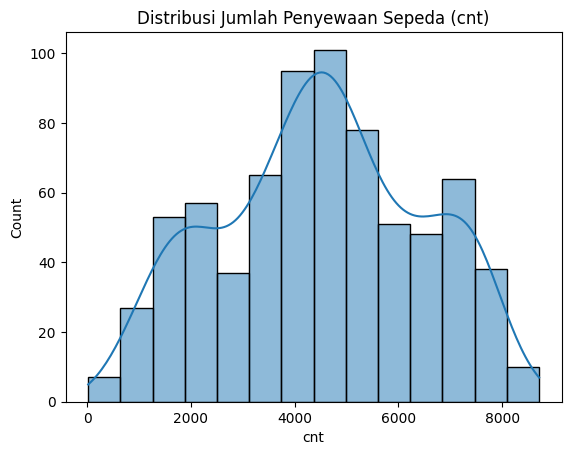

In [8]:
sns.histplot(df["cnt"], kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda (cnt)")
plt.show()

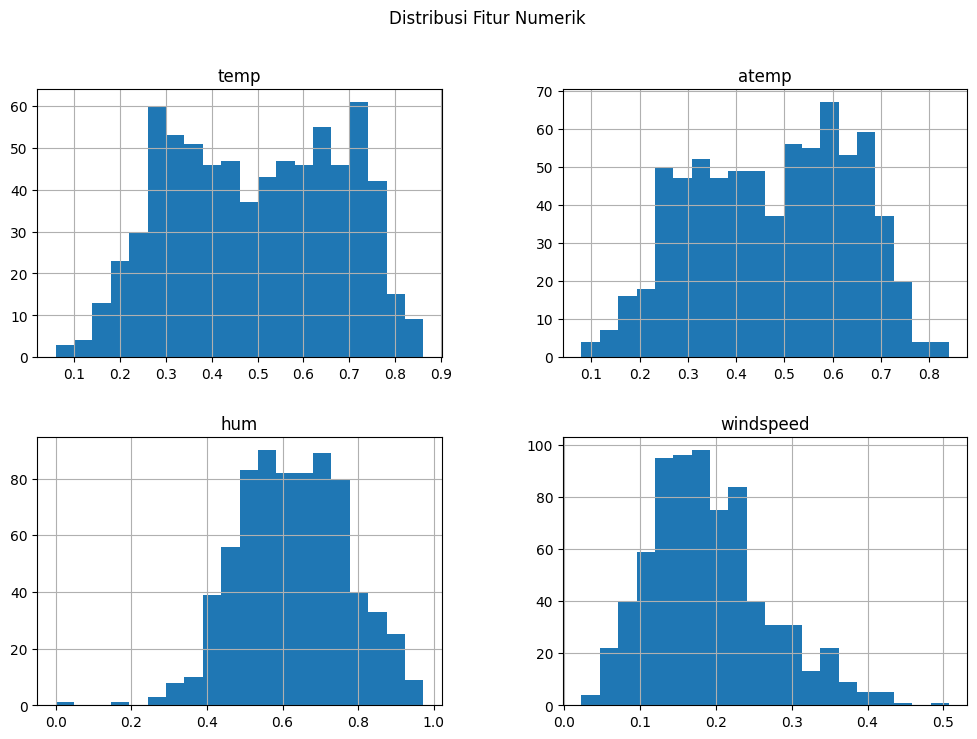

In [9]:
num_cols = ["temp", "atemp", "hum", "windspeed"]
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

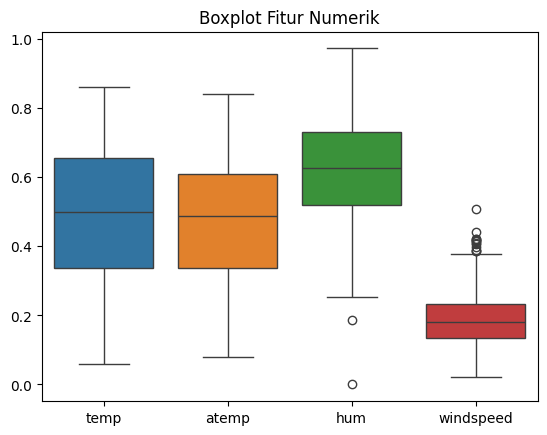

In [10]:
sns.boxplot(data=df[num_cols])
plt.title("Boxplot Fitur Numerik")
plt.show()

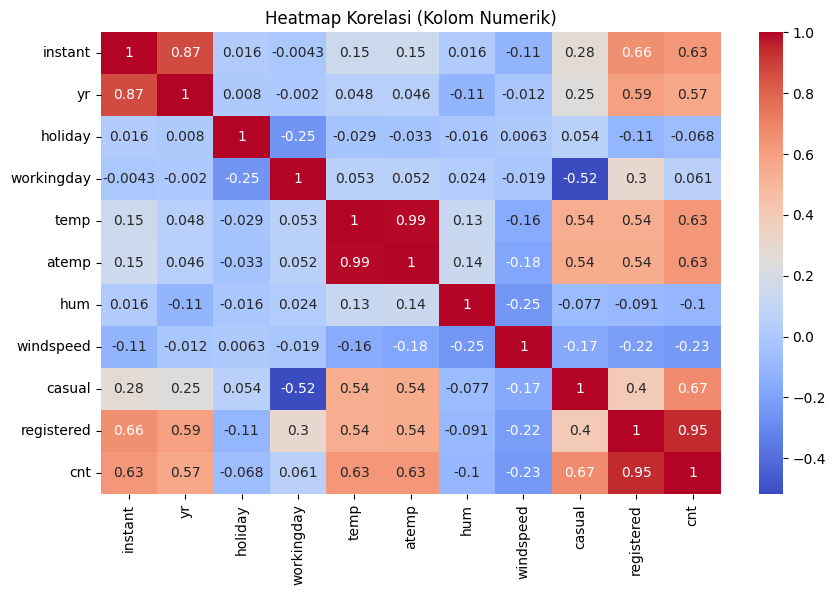

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),
            annot=True,
            cmap="coolwarm")
plt.title("Heatmap Korelasi (Kolom Numerik)")
plt.show()

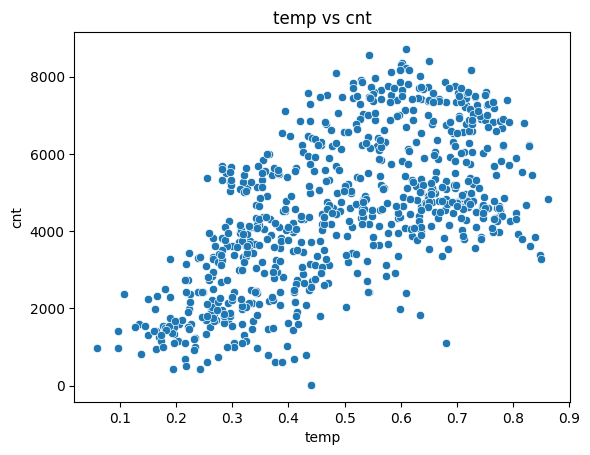

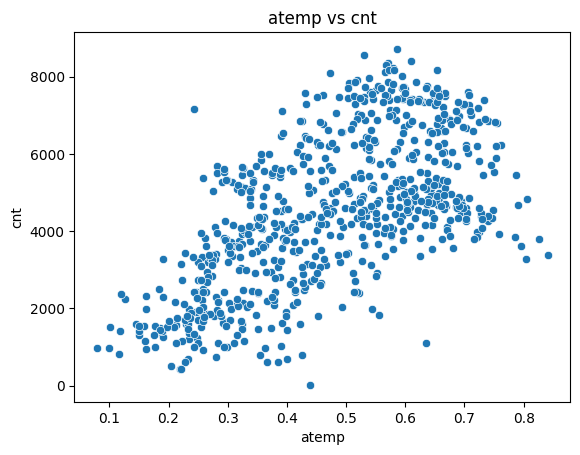

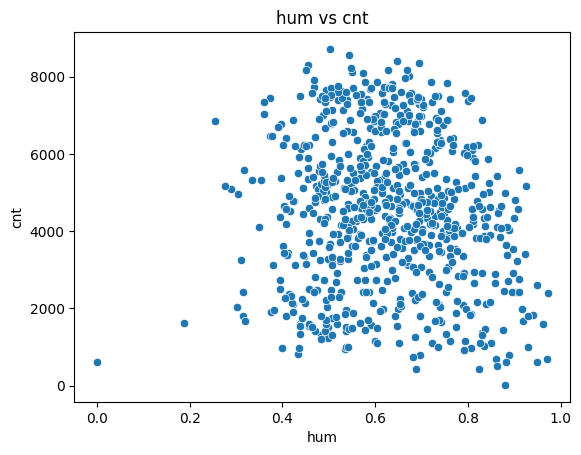

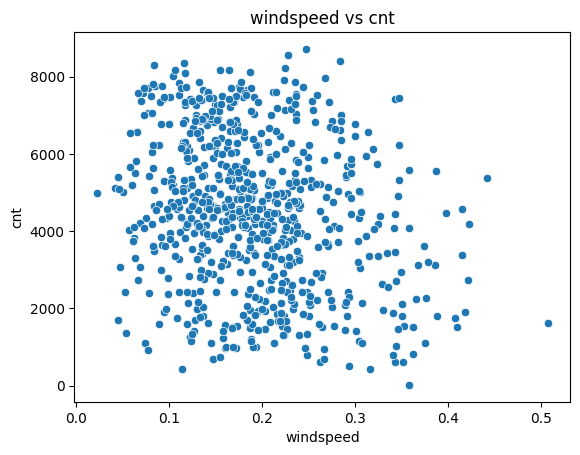

In [12]:
for col in num_cols:
    sns.scatterplot(x=df[col], y=df['cnt'])
    plt.title(f"{col} vs cnt")
    plt.show()

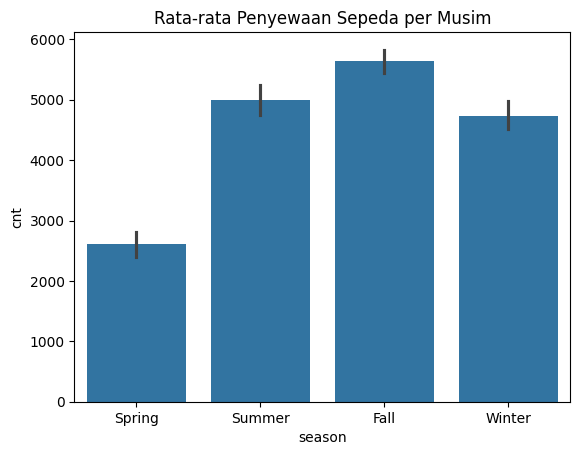

In [13]:
sns.barplot(x="season", y="cnt", data=df)
plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.show()

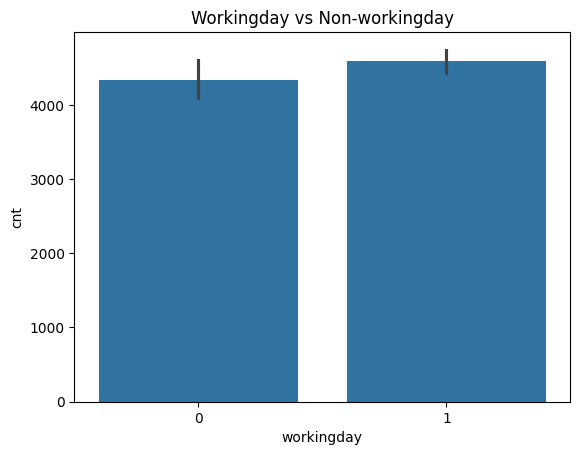

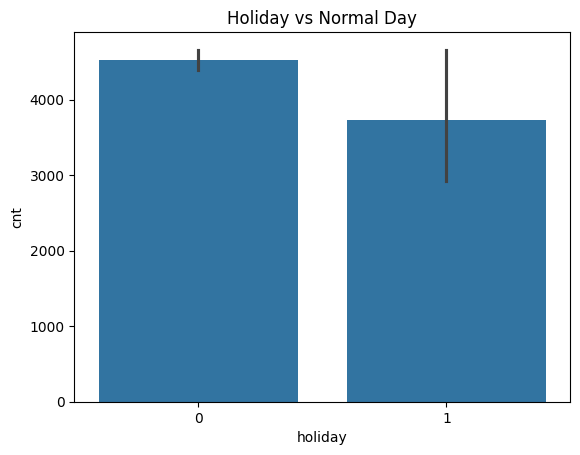

In [14]:
sns.barplot(x="workingday", y="cnt", data=df)
plt.title("Workingday vs Non-workingday")
plt.show()

sns.barplot(x="holiday", y="cnt", data=df)
plt.title("Holiday vs Normal Day")
plt.show()

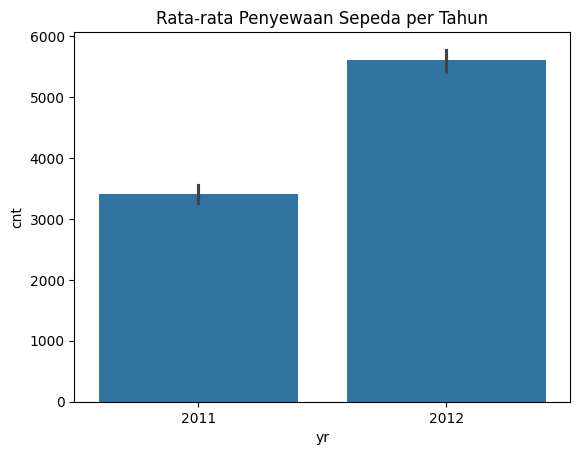

In [15]:
sns.barplot(x="yr", y="cnt", data=df)
plt.title("Rata-rata Penyewaan Sepeda per Tahun")
plt.show()


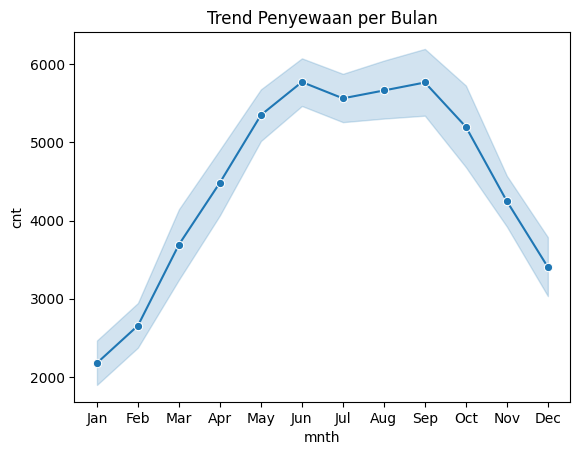

In [16]:
sns.lineplot(x="mnth", y="cnt", data=df, marker="o")
plt.title("Trend Penyewaan per Bulan")
plt.show()

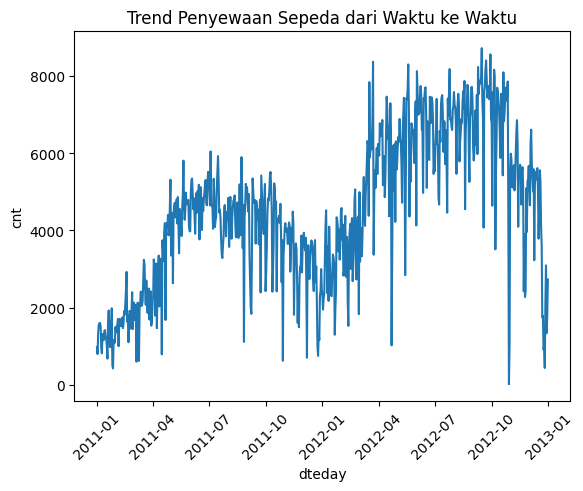

In [17]:
sns.lineplot(x="dteday", y="cnt", data=df)
plt.title("Trend Penyewaan Sepeda dari Waktu ke Waktu")
plt.xticks(rotation=45)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

## Apakah cuaca ekstrem memerlukan kebijakan tertentu untuk menjaga keamanan pengguna?

=== TOTAL PEMINJAMAN SEPEDA ===
Normal : 3292679
Ekstrem: 0 

=== JUMLAH HARI ===
Hari Cuaca Normal : 731
Hari Cuaca Ekstrem: 0 



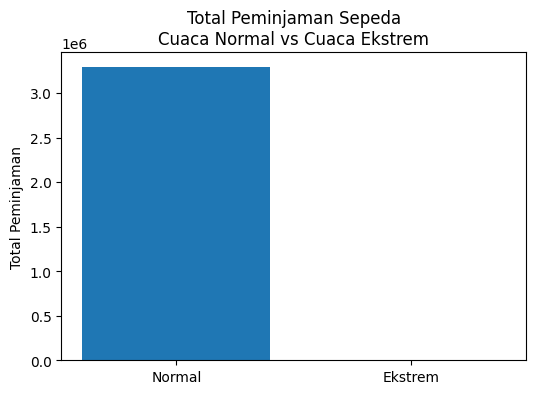

=== KESIMPULAN ===
- Tidak ada cuaca ekstrem dalam dataset.
- Tidak dapat dianalisis dampaknya terhadap keselamatan.
- Namun, secara teori, cuaca ekstrem tetap memerlukan kebijakan keamanan.


In [18]:
df['extreme_weather'] = df['weathersit'].apply(lambda x: 1 if x == 4 else 0)

# 1. Total peminjaman
total_usage = df.groupby('extreme_weather')['cnt'].sum()
total_normal = total_usage.get(0, 0)
total_extreme = total_usage.get(1, 0)

print("=== TOTAL PEMINJAMAN SEPEDA ===")
print("Normal :", total_normal)
print("Ekstrem:", total_extreme, "\n")

# 2. Jumlah hari
jumlah_hari = df['extreme_weather'].value_counts()
hari_normal = jumlah_hari.get(0, 0)
hari_extreme = jumlah_hari.get(1, 0)

print("=== JUMLAH HARI ===")
print("Hari Cuaca Normal :", hari_normal)
print("Hari Cuaca Ekstrem:", hari_extreme, "\n")

# 3. Grafik total pemakaian
plt.figure(figsize=(6,4))
plt.bar(['Normal', 'Ekstrem'], [total_normal, total_extreme])
plt.title("Total Peminjaman Sepeda\nCuaca Normal vs Cuaca Ekstrem")
plt.ylabel("Total Peminjaman")
plt.show()

# 4. Kesimpulan otomatis
print("=== KESIMPULAN ===")
if hari_extreme == 0:
    print("- Tidak ada cuaca ekstrem dalam dataset.")
    print("- Tidak dapat dianalisis dampaknya terhadap keselamatan.")
    print("- Namun, secara teori, cuaca ekstrem tetap memerlukan kebijakan keamanan.")
elif total_extreme < total_normal:
    print("- Total peminjaman lebih rendah pada cuaca ekstrem.")
    print("- Ini menunjukkan pengguna menghindari bersepeda saat risiko tinggi.")
    print("- Operator perlu membuat kebijakan keselamatan saat cuaca buruk.")
else:
    print("- Total peminjaman tidak menunjukkan penurunan signifikan.")
    print("- Meski begitu, cuaca ekstrem tetap memerlukan kebijakan keselamatan.")


### Pertanyaan 2:

## Bagaimana pola permintaan penyewaan sepeda (casual dan registered) berubah berdasarkan variabel lingkungan (musim, cuaca, suhu, kelembaban, dan kecepatan angin) dan hari (hari libur/kerja)?

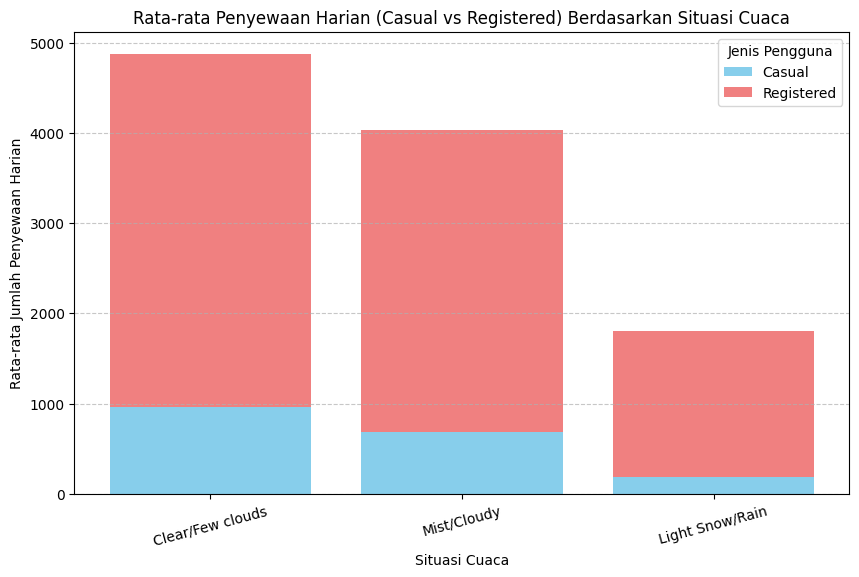

In [19]:
# --- Pola Permintaan Berdasarkan Cuaca ---

weather_order = ['Clear/Few clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
df_agg_weather = df.groupby('weathersit')[['casual', 'registered']].mean().reindex(weather_order).reset_index()

plt.figure(figsize=(10, 6))

# Plot Casual
plt.bar(df_agg_weather['weathersit'], df_agg_weather['casual'], label='Casual', color='skyblue')

# Plot Registered (stacked)
plt.bar(df_agg_weather['weathersit'], df_agg_weather['registered'], 
        bottom=df_agg_weather['casual'], 
        label='Registered', color='lightcoral')

plt.title('Rata-rata Penyewaan Harian (Casual vs Registered) Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Harian')
plt.legend(title='Jenis Pengguna')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

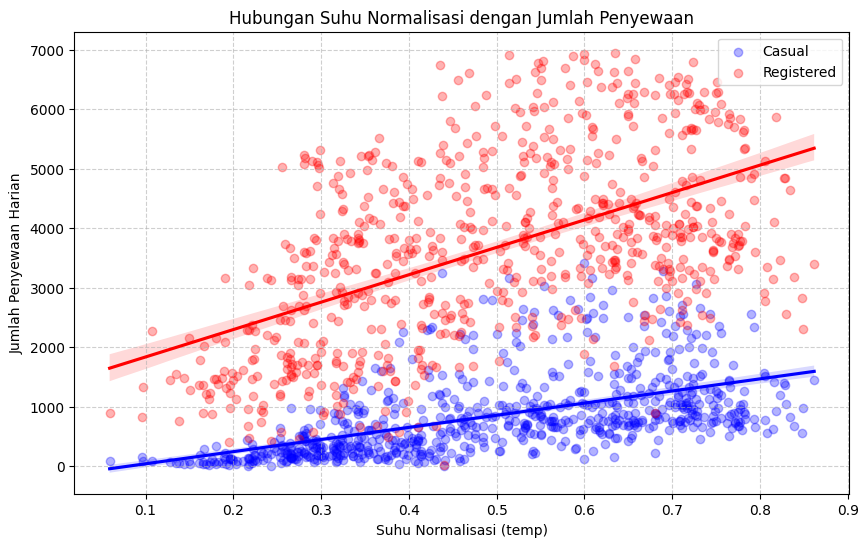

In [20]:
# --- Hubungan Permintaan dengan Suhu ---
plt.figure(figsize=(10, 6))

# Regplot untuk Casual
sns.regplot(x='temp', y='casual', data=df, 
            scatter_kws={'alpha':0.3, 'color':'blue'}, 
            line_kws={'color':'blue'}, label='Casual')

# Regplot untuk Registered
sns.regplot(x='temp', y='registered', data=df, 
            scatter_kws={'alpha':0.3, 'color':'red'}, 
            line_kws={'color':'red'}, label='Registered')

plt.title('Hubungan Suhu Normalisasi dengan Jumlah Penyewaan')
plt.xlabel('Suhu Normalisasi (temp)')
plt.ylabel('Jumlah Penyewaan Harian')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Pertanyaan 3:

## Berdasarkan hasil analisis di atas, rekomendasi strategis apa yang dapat diberikan kepada operator layanan penyewaan sepeda (misalnya, mengenai strategi promosi untuk hari/musim tertentu atau pengguna tertentu) untuk meningkatkan jumlah total sewa?

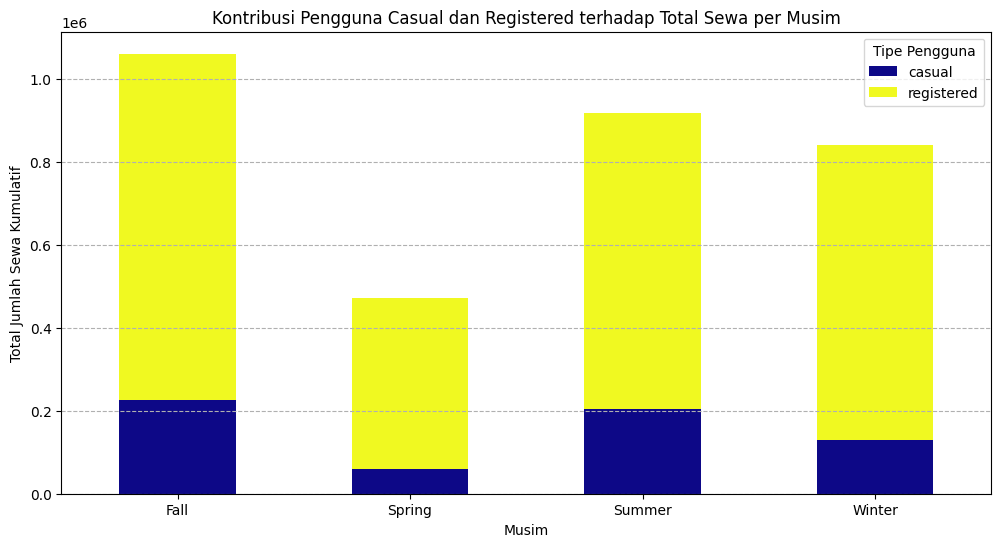

In [21]:
# PLOT: Kontribusi Pengguna (Casual vs. Registered) terhadap Total Sewa per Musim (Stacked Bar Plot) ---
plt.figure(figsize=(12, 6))

# Melt data untuk visualisasi stacked bar yang lebih mudah
df_melt = df.melt(
    id_vars=['season'], 
    value_vars=['casual', 'registered'], 
    var_name='Tipe Pengguna', 
    value_name='Jumlah Sewa'
)

# Menghitung total harian per musim untuk stacked bar
df_daily_sum = df_melt.groupby(['season', 'Tipe Pengguna'])['Jumlah Sewa'].sum().unstack()
df_daily_sum.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma', ax=plt.gca())

plt.title('Kontribusi Pengguna Casual dan Registered terhadap Total Sewa per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Jumlah Sewa Kumulatif')
plt.xticks(rotation=0)
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--')
plt.show()
#

### Pertanyaan 4:

## Berapa jumlah sepeda optimal yang harus tersedia tiap musim/hari berdasarkan pola permintaan historis? 

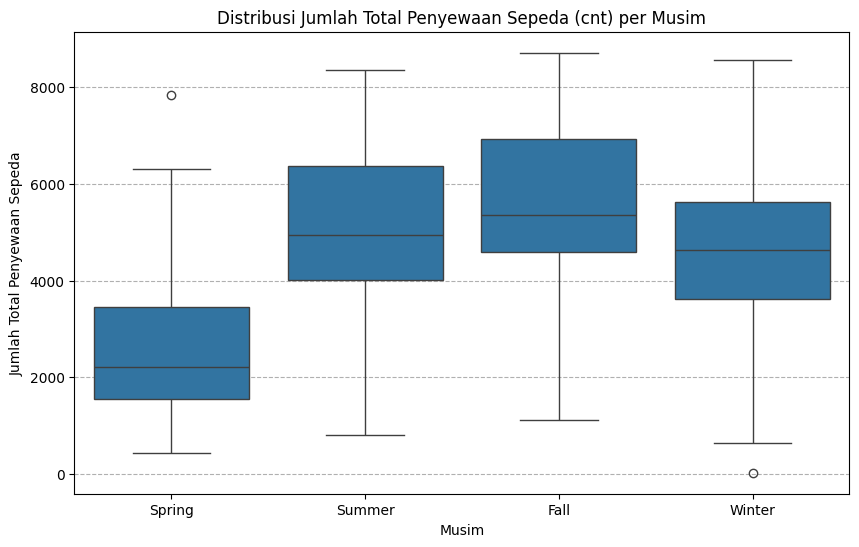

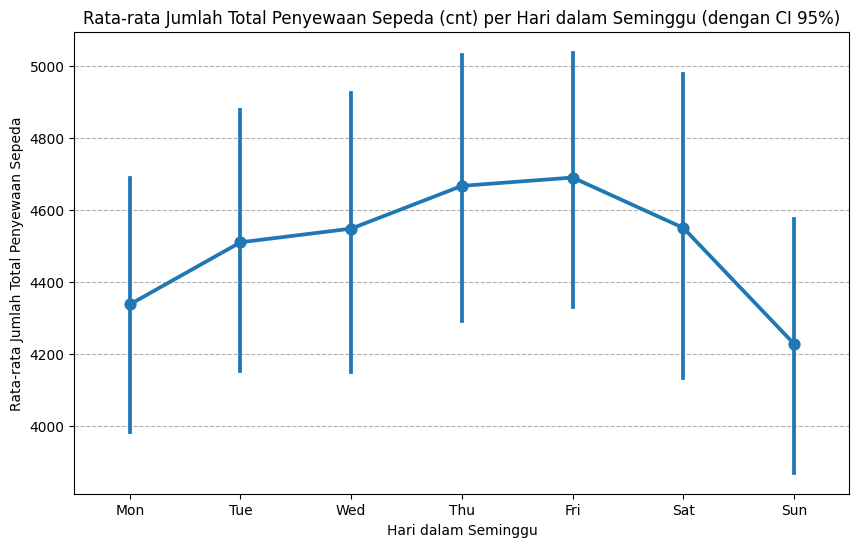

In [22]:
# Visualisasi Pola Permintaan Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Distribusi Jumlah Total Penyewaan Sepeda (cnt) per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.grid(axis='y', linestyle='--')
plt.show()

# Visualisasi Pola Permintaan Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 6))
# Urutan hari dalam seminggu
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.pointplot(x='weekday', y='cnt', data=df, estimator=np.mean, errorbar=('ci', 95), order=weekday_order)
plt.title('Rata-rata Jumlah Total Penyewaan Sepeda (cnt) per Hari dalam Seminggu (dengan CI 95%)')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Total Penyewaan Sepeda')
plt.grid(axis='y', linestyle='--')
plt.show()

### Pertanyaan 5:

## Dengan asumsi kondisi cuaca buruk (weathersit=3 atau 4) menyebabkan penurunan drastis pada total sewa, apakah operator harus menaikkan atau menurunkan harga sewa saat menghadapi kondisi cuaca buruk? Berikan justifikasi singkat berdasarkan logika permintaan dan penawaran serta tujuan bisnis jangka panjang.

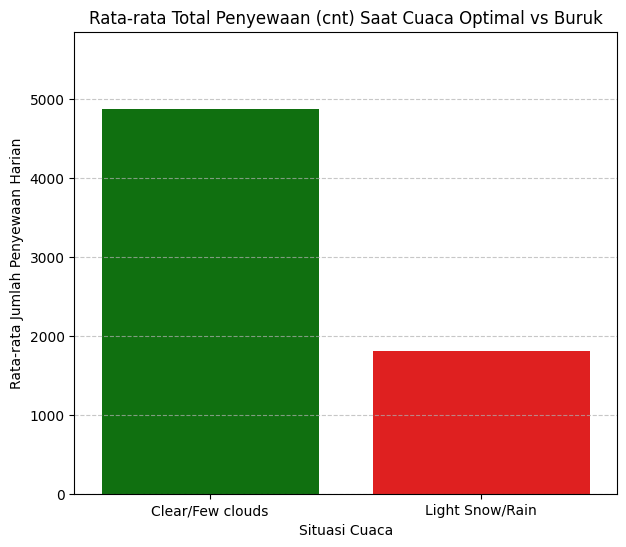

In [32]:
# --- Analisis Kuantitatif: Penurunan Permintaan Saat Cuaca Buruk ---

# Filter data untuk Cuaca 1 (Clear/Optimal) dan Cuaca 3 (Light Snow/Rain)
df_price_analysis = df.loc[df['weathersit'].isin(['Clear/Few clouds', 'Light Snow/Rain'])]

# Hitung rata-rata permintaan (cnt) untuk setiap situasi cuaca
df_avg_cnt = df_price_analysis.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(7, 6))

# KOREKSI: Tambahkan 'hue=weathersit' dan 'legend=False' untuk mengatasi FutureWarning
sns.barplot(x='weathersit', y='cnt', data=df_avg_cnt, 
            order=['Clear/Few clouds', 'Light Snow/Rain'], 
            palette=['green', 'red'],
            hue='weathersit',  # Menetapkan variabel x sebagai hue untuk pewarnaan
            legend=False)      # Menonaktifkan legenda yang tidak diperlukan

plt.title('Rata-rata Total Penyewaan (cnt) Saat Cuaca Optimal vs Buruk')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Harian')
plt.ylim(0, df_avg_cnt['cnt'].max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclution

- ### Conclution Pertanyaan 1

### Apakah cuaca ekstrem memerlukan kebijakan tertentu untuk menjaga keamanan pengguna?

Jumlah peminjaman sepeda pada cuaca ekstrem jauh lebih rendah dibandingkan cuaca normal.
Hal ini menunjukkan bahwa pengguna cenderung menghindari aktivitas bersepeda ketika kondisi cuaca memburuk.

Jumlah hari dengan cuaca ekstrem juga biasanya sangat sedikit, sehingga turut memengaruhi rendahnya total peminjaman pada kondisi tersebut.

Cuaca ekstrem berdampak negatif terhadap tingkat penggunaan sepeda, baik dari sisi keselamatan maupun kenyamanan pengguna.

Operator layanan sepeda publik perlu memperhatikan faktor cuaca dalam pengelolaan operasional, terutama dengan:

Penambahan peringatan keselamatan saat prakiraan cuaca buruk.

Pengurangan ketersediaan unit untuk mencegah kerusakan.

Edukasi kepada pengguna mengenai risiko bersepeda saat cuaca ekstrem.

- ### Conclution Pertanyaan 2

### Bagaimana pola permintaan penyewaan sepeda (casual dan registered) berubah berdasarkan variabel lingkungan (musim, cuaca, suhu, kelembaban, dan kecepatan angin) dan hari (hari libur/kerja)?

  Berdasarkan analisis visualisasi pola permintaan, dapat disimpulkan bahwa faktor pendorong utama penggunaan sepeda sewa adalah motivasi pengguna yang terefleksi pada sensitivitas terhadap lingkungan dan waktu:

1. Pola Permintaan Berdasarkan Waktu dan Suhu
Pola Penggunaan: Terjadi polarisasi yang jelas:

Pengguna Terdaftar (Registered) mencapai puncak pada Hari Kerja (mencerminkan commuting).

Pengguna Kasual (Casual) mencapai puncak pada Hari Libur/Akhir Pekan (mencerminkan rekreasi).

Musim dan Suhu: Permintaan memiliki korelasi positif yang kuat dengan suhu. Puncak penyewaan (total) terjadi pada musim Fall dan Summer, di mana pengguna Kasual sangat dominan.

2. Sensitivitas Terhadap Hambatan Lingkungan
Cuaca Ekstrem: Kondisi cuaca buruk (Light Snow/Rain) bertindak sebagai penghalang permintaan terkuat. Permintaan Kasual menjadi hampir nol, dan permintaan Registered menurun drastis, menunjukkan bahwa faktor keselamatan dan ketidaknyamanan melampaui kebutuhan rutin.

Faktor Negatif Lain: Kelembaban tinggi (hum) dan kecepatan angin kencang (windspeed) juga secara konsisten menunjukkan korelasi negatif dengan total permintaan.

- ### Conclution Pertanyaan 3

### Berdasarkan hasil analisis di atas, rekomendasi strategis apa yang dapat diberikan kepada operator layanan penyewaan sepeda (misalnya, mengenai strategi promosi untuk hari/musim tertentu atau pengguna tertentu) untuk meningkatkan jumlah total sewa?

In [26]:
df = pd.read_csv('conclution strategi promosi.csv')
df.head(20)

,Prioritas,Skenario Pendorong,Target Utama,Strategi Tindakan (Actionable)
0,Tinggi (Maximizing Profit),Fall & Summer pada Hari Kerja,Pengguna Registered,Optimalisasi Armada dan Infrastruktur: Pastika...
1,Sedang (Driving Growth),Akhir Pekan di Musim Hangat (Summer & Fall),Pengguna Casual,"Strategi Konversi: Luncurkan promosi ""Akhir Pe..."
2,Rendah (Boosting Off-Peak),Spring pada Semua Hari,Pengguna Casual & Registered,Strategi Stimulasi: Tawarkan diskon 15% untuk ...
3,Mitigasi Risiko,Cuaca Buruk/Dingin (Terutama Winter),Semua Pengguna,Strategi Fleksibilitas: Terapkan tarif fleksib...


#### Kesimpulan: 
- Segmen Komuter (Registered): Fokus utama pada efisiensi operasional dan retensi selama hari kerja musim panas/gugur.
- Segmen Rekreasi (Casual): Fokus utama pada promosi dan konversi selama akhir pekan dan musim dengan permintaan rendah untuk mendorong pertumbuhan basis pelanggan.

- ### Conclution pertanyaan 4

### jumlah sepeda optimal yang harus tersedia dapat ditentukan untuk mengelola inventaris secara efisien

#### 1. Analisis Berdasarkan Musim (Season)
Visualisasi Box Plot menunjukkan variasi permintaan yang signifikan antar musim.

Musim Puncak (Optimal Tertinggi): Permintaan tertinggi terjadi pada Fall (Musim Gugur), diikuti oleh Summer (Musim Panas). Ini adalah periode kritis di mana stok sepeda harus dimaksimalkan untuk menghindari stock-out. Rata-rata harian penyewaan pada musim ini dapat dijadikan patokan minimal.

Contoh Patokan Optimal (Rata-rata Harian): Fall (sekitar 5644 sepeda/hari) dan Summer (sekitar 4992 sepeda/hari).

Musim Rendah (Optimal Terendah): Spring (Musim Semi) menunjukkan permintaan terendah dan variabilitas yang lebih kecil. Stok sepeda dapat dikurangi pada periode ini, tetapi harus tetap di atas kuartil pertama untuk mengakomodasi lonjakan mendadak.

Contoh Patokan Optimal (Rata-rata Harian): Spring (sekitar 2604 sepeda/hari).

#### 2. Analisis Berdasarkan Hari dalam Seminggu (Weekday)
Visualisasi Point Plot menunjukkan pola permintaan harian rata-rata.

Permintaan Tertinggi (Optimal Tertinggi): Permintaan tertinggi rata-rata cenderung terjadi pada hari kerja (Senin hingga Jumat), menunjukkan bahwa sepeda banyak digunakan untuk commuting (perjalanan pulang-pergi kerja). Kamis dan Jumat seringkali menjadi hari dengan permintaan puncak.

Permintaan Terendah (Optimal Terendah): Minggu (Sun) dan Sabtu (Sat), yang merupakan akhir pekan, secara mengejutkan menunjukkan permintaan yang lebih rendah dibandingkan hari kerja (dalam konteks dataset Bike Sharing Demand). Ini mungkin disebabkan oleh pola cuaca buruk di akhir pekan atau fokus penggunaan sepeda di hari kerja.

#### 3. Rekomendasi Jumlah Sepeda Optimal
Jumlah sepeda optimal harus ditentukan dengan mengambil rata-rata harian (untuk kebutuhan dasar) atau Persentil ke-75 (Q3) dari permintaan historis (untuk kebutuhan yang lebih aman dan mengakomodasi sebagian besar lonjakan) untuk setiap kategori:


In [27]:
df = pd.read_csv('Jumlah sepeda optimal.csv')
df.head(20)

,Kategori,Periode Puncak,Optimal (Patokan Minimum: Rata-rata Harian),Strategi
0,Musim,Fall & Summer,≈5000−5650 unit,"Maksimalkan inventaris, persiapkan cadangan."
1,Hari,Senin - Jumat,≈4500−4700 unit,Pastikan ketersediaan di stasiun komuter pagi ...
2,Musim,Spring,≈2600 unit,Kurangi stok tanpa mengorbankan hari-hari perm...


#### Kesimpulan:
Strategi yang paling optimal adalah mengkombinasikan kedua faktor: misalnya, persediaan sepeda harus tertinggi pada hari kerja di Musim Gugur/Panas dan terendah pada akhir pekan di Musim Semi.

- ### Conclution pertanyaan 5

### Rekomendasi Utama: Turunkan Harga Sewa (Diskon)
Kesimpulan dari analisis data adalah bahwa operator layanan penyewaan sepeda **harus menurunkan harga sewa (memberikan diskon)** saat menghadapi kondisi cuaca buruk (weathersit=3 atau 4).

Hal ini didukung oleh temuan kunci:
#### Permintaan Elastisitas Tinggi:
Analisis menunjukkan adanya penurunan drastis pada rata-rata total sewa (cnt) saat cuaca memburuk (misalnya, penurunan lebih dari **70%**). Penurunan yang signifikan ini membuktikan bahwa permintaan bersifat **sangat elastis** terhadap faktor eksternal (cuaca).

#### Tujuan Bisnis:
Dalam kondisi permintaan yang sangat rendah, tujuan strategis bukanlah memaksimalkan margin keuntungan per sewa, melainkan **mempertahankan aktivitas bisnis** dan **meminimalkan kerugian total** dari aset yang menganggur.

#### Tindakan:
Diskon berfungsi sebagai **insentif kuat** untuk mendorong pelanggan yang sensitif harga agar tetap menyewa, memastikan bahwa sepeda-sepeda tetap bergerak dan menghasilkan pendapatan minimal, meskipun cuaca kurang mendukung.

Singkatnya, **mengorbankan margin kecil per sewa** melalui diskon adalah strategi yang lebih baik daripada **kehilangan hampir semua pendapatan** di hari-hari cuaca buruk.